In [98]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data_df = pd.read_csv(mouse_drug_data_to_load)

clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combine_data_df = pd.merge(mouse_data_df, clinical_data_df)

# Display the data table for previe

combine_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [99]:
combine_data_df.dtypes


Mouse ID               object
Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Tumor Response to Treatment

In [100]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vols_mean = combine_data_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Preview DataFrame
tumor_vols_mean


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [101]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_mean = combine_data_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame

tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Preview DataFrame

tumor_vols_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [102]:
#Minor Data Munging to re-format the data frame
tumor_vols_mean = pd.pivot_table(combine_data_df, index = ['Timepoint'], columns=['Drug'])
tumor_vols_mean = tumor_vols_mean.loc[:, 'Tumor Volume (mm3)']
tumor_vols_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [103]:
#Generate the Plot -error bars: Capomulin, Infubinol, Ketapril, Placebo
Capomulin = tumor_vols_mean[["Capomulin"]]
Capomulin_list =  Capomulin["Capomulin"].tolist()
Capomulin_sem = tumor_vols_mean[["Capomulin"]]
Capomulin_list_sem = Capomulin_sem["Capomulin"].tolist()

Infubinol = tumor_vols_mean[["Infubinol"]]
Infubinol_list =  Infubinol["Infubinol"].tolist()
Infubinol_sem = tumor_vols_mean[["Infubinol"]]
Infubinol_list_sem = Infubinol_sem["Infubinol"].tolist()

Ketapril = tumor_vols_mean[["Ketapril"]]
Ketapril_list =  Ketapril["Ketapril"].tolist()
Ketapril_sem = tumor_vols_mean[["Ketapril"]]
Ketapril_list_sem = Ketapril_sem["Ketapril"].tolist()

Placebo = tumor_vols_mean[["Placebo"]]
Placebo_list =  Placebo["Placebo"].tolist()
Placebo_sem = tumor_vols_mean[["Placebo"]]
Placebo_list_sem = Placebo_sem["Placebo"].tolist()

#Save the figure

<function matplotlib.pyplot.show(*args, **kw)>

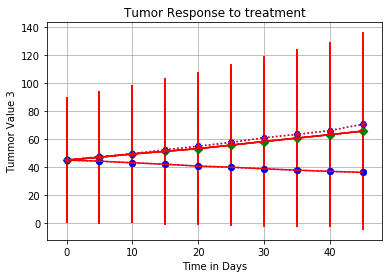

In [104]:
# Show the Figure

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

#Create an array
#rades_range = [20,40,60,80,100]

plt.scatter(x_axis, Capomulin_list, marker="o", color="black")
plt.plot(x_axis, Capomulin_list, "b:o", label="Capomulin")
plt.errorbar(x_axis,Capomulin_list, yerr= Capomulin_list_sem, color="red")

plt.scatter(x_axis,Infubinol_list, marker="D", color ="green")
plt.plot(x_axis, Infubinol_list, "g:D", label="Infubinol")
plt.errorbar(x_axis,Infubinol_list, yerr= Infubinol_list_sem, color="red")

plt.scatter(x_axis,Ketapril_list, marker="H", color="blue")
plt.plot(x_axis, Ketapril_list, "b:H", label="Infubinol")
plt.errorbar(x_axis,Infubinol_list, yerr= Ketapril_list_sem, color="red")

plt.scatter(x_axis,Ketapril_list, marker="*", color="red")
plt.plot(x_axis, Ketapril_list, "r:*", label="Infubinol")
plt.errorbar(x_axis,Infubinol_list, yerr= Ketapril_list_sem, color="red")

plt.title ("Tumor Response to treatment")
plt.xlabel("Time in Days")
plt.ylabel('Tummor Value 3')
plt.grid()

#Safe the figure
#plt.savefig('Images/treatment.png')

#print chart
plt.show

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [132]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = combine_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)
                                        
# Preview DataFrame
mean_met_site_df.head()

KeyError: 'Drug'

In [119]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stat_std_error = combine_data_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
met_stat_std_error = pd.DataFrame(met_stat_std_error)

# Preview DataFrame
met_stat_std_error

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
...                               ...       ...                 ...
Zoniferol 25                 0.236621       NaN            0.602513
          30                 0.248168       NaN            0.800043
          35                 0.285714       NaN            0.881426
          40                 0.299791       NaN            0.998515
          45                 0.286400       NaN            1.003576

[100 rows x 3 columns]

In [140]:
# Minor Data Munging to Re-Format the Data Frames
combine_data_mung = pd.pivot_table(combine_data_df, index= ['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
combine_data_mung_df = combine_data_mung_df.loc[:, ['Tumor Voulume (mm3)']

combine_data_mung_df

SyntaxError: invalid syntax (<ipython-input-140-35f9d82bab7d>, line 7)

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes

# Call functions to implement the function calls

# Save the Figure

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)